In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Dataset .csv")
pd.set_option('display.max_columns',21)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


## Data Cleaning

In [3]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Level 2

## Task1: Restaurant Ratings
1. Analyze the distribution of aggregate ratings and determine the most common rating range.
2. Calculate the average number of votes received by restaurants.


In [5]:
df.columns =  df.columns.str.lower()
df.columns

Index(['restaurant id', 'restaurant name', 'country code', 'city', 'address',
       'locality', 'locality verbose', 'longitude', 'latitude', 'cuisines',
       'average cost for two', 'currency', 'has table booking',
       'has online delivery', 'is delivering now', 'switch to order menu',
       'price range', 'aggregate rating', 'rating color', 'rating text',
       'votes'],
      dtype='object')

In [6]:
df['aggregate rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

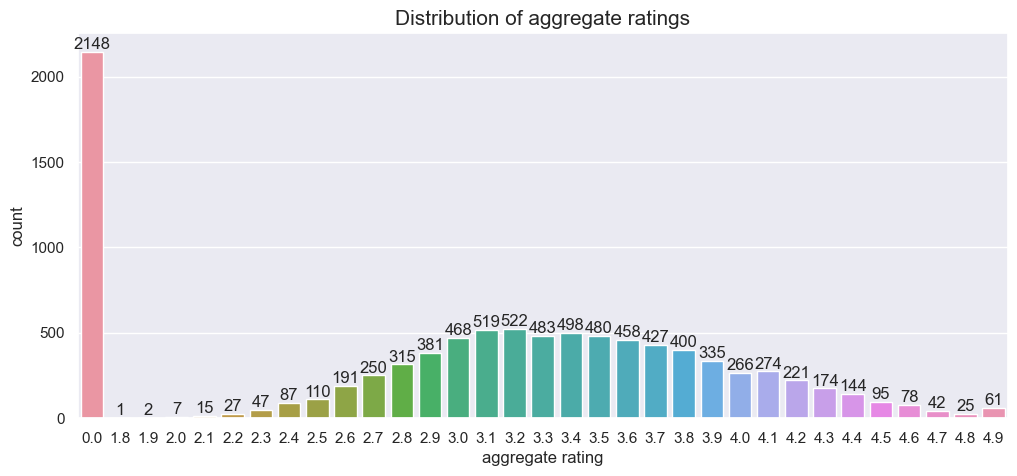

In [7]:
ratings  = df.groupby('aggregate rating').size().reset_index()
ratings.columns = ['aggregate rating','count']
sns.set(rc={'figure.figsize':(12,5)})
x=sns.barplot(x='aggregate rating',y='count',data=ratings)
for bars in x.containers:
    x.bar_label(bars)
plt.title("Distribution of aggregate ratings",fontsize=15)
plt.show()

### From the above plot we can observe that the most common range of aggregate ratings is 2.8-3.9

In [8]:
# Calculate the average number of votes received by restaurants.
df.votes.value_counts()

0      1094
1       483
2       327
3       244
4       207
       ... 
615       1
538       1
823       1
650       1
901       1
Name: votes, Length: 1012, dtype: int64

In [9]:
avg_votes = df.groupby('restaurant name',as_index=False).agg({'votes':'mean'}).sort_values('votes',ascending=False).head(10)
avg_votes

,restaurant name,votes
6943,Toit,10934.0
2879,Hauz Khas Social,7931.0
4902,Peter Cat,7574.0
783,Big Brewsky,5705.0
6449,The Black Pearl,5385.0
659,BarBQ,5288.0
7243,Warehouse Cafe,4914.0
6988,Truffles,4841.0
4213,Mocambo,4464.0
2765,Gulati,4373.0


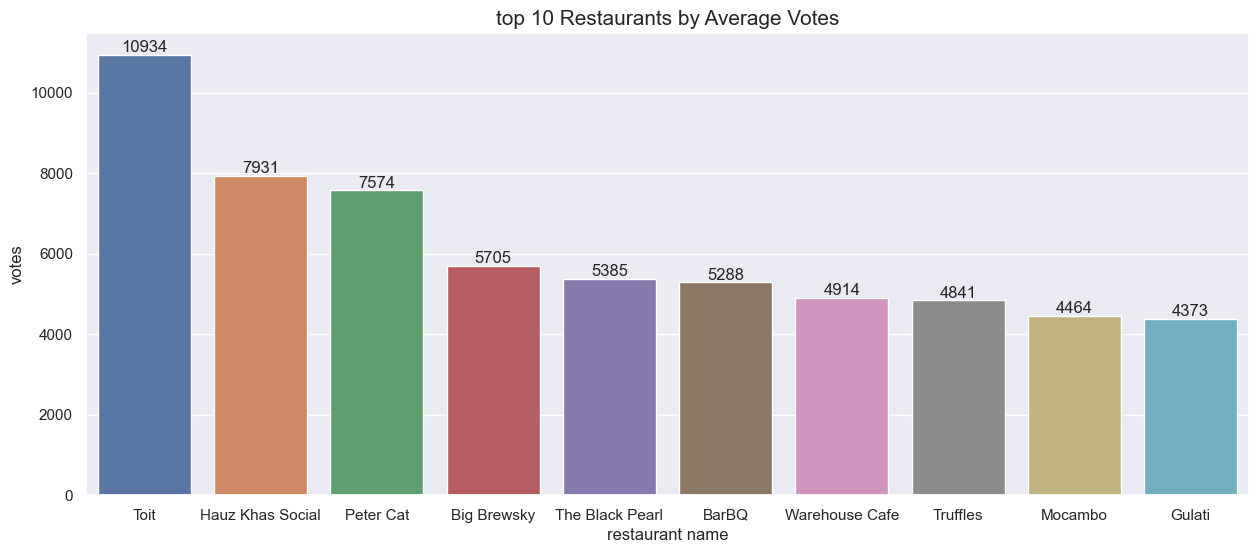

In [10]:
sns.set(rc={'figure.figsize':(15,6)})
x=sns.barplot(x='restaurant name',y='votes',data=avg_votes)
for bars in x.containers:
    x.bar_label(bars)
plt.title("top 10 Restaurants by Average Votes",fontsize=15)
plt.show()

## Task2: Cuisine Combination
1. Identify the most common combinations of cuisines in the dataset.
2. Determine if certain cuisine combinations tend to have higher ratings.

In [11]:
df['cuisines'] = df['cuisines'].astype(str).apply(lambda x: x.split(', '))
filtered_df = df[df['cuisines'].apply(lambda x: len(x) > 1)]
filtered_df.head()

,restaurant id,restaurant name,country code,city,address,locality,locality verbose,longitude,latitude,cuisines,average cost for two,currency,has table booking,has online delivery,is delivering now,switch to order menu,price range,aggregate rating,rating color,rating text,votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"[French, Japanese, Desserts]",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"[Seafood, Asian, Filipino, Indian]",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"[Japanese, Sushi]",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"[Japanese, Korean]",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"[Asian, European]",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520


In [12]:
# now coverting values in cuisine column from list to string
filtered_df['cuisines'] = filtered_df['cuisines'].apply(lambda x: ','.join(x))
filtered_df.head()

,restaurant id,restaurant name,country code,city,address,locality,locality verbose,longitude,latitude,cuisines,average cost for two,currency,has table booking,has online delivery,is delivering now,switch to order menu,price range,aggregate rating,rating color,rating text,votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French,Japanese,Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood,Asian,Filipino,Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese,Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese,Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian,European",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520


In [13]:
top_cuisine_combo = filtered_df.groupby('cuisines',as_index=False).agg({'aggregate rating':'mean'}).rename(columns={'aggregate rating':'average_rating'}).sort_values('average_rating',ascending=False)
top_cuisine_combo['average_rating'] = top_cuisine_combo['average_rating'].round(1)
top_cuisine_combo

,cuisines,average_rating
1015,"Italian,Deli",4.9
657,"Continental,Indian",4.9
910,"Hawaiian,Seafood",4.9
30,"American,Burger,Grill",4.9
38,"American,Coffee and Tea",4.9
...,...,...
520,"Chinese,Mithai",0.0
516,"Chinese,Lucknowi",0.0
197,"Bakery,Healthy Food",0.0
1329,"North Indian,Chinese,Tibetan",0.0


### By this dataframe we can look at  the cuisine combinations with higher ratings

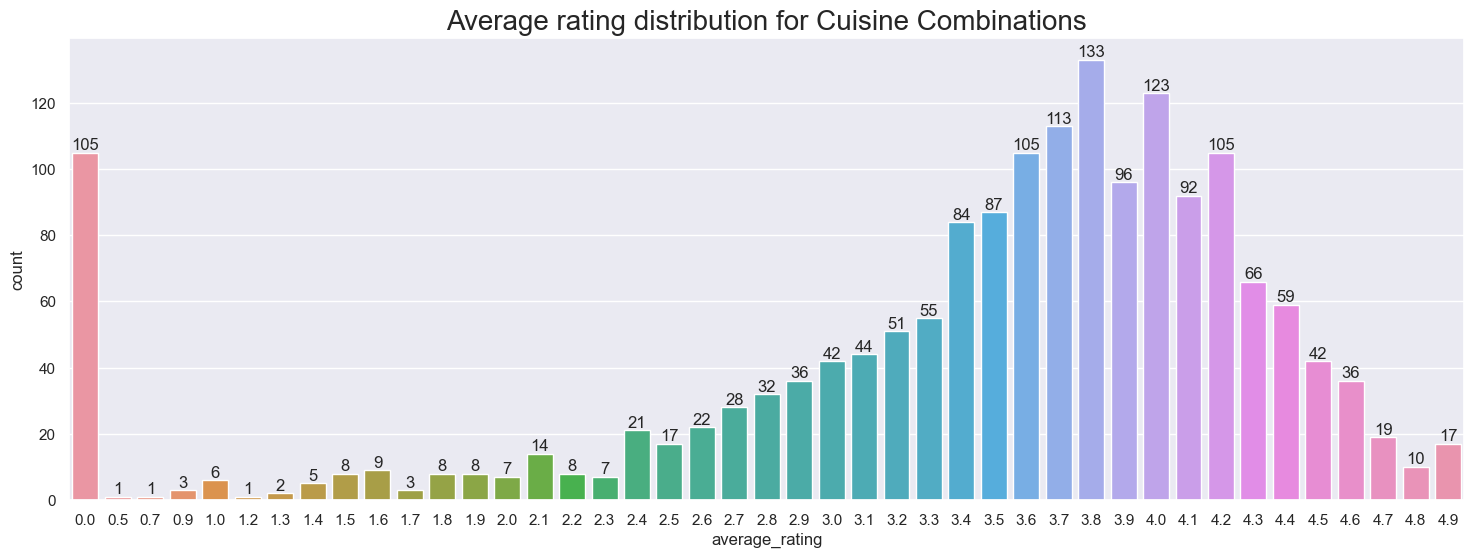

In [14]:
top_cuisine_combo_rating = top_cuisine_combo.groupby('average_rating').size().reset_index()
top_cuisine_combo_rating.columns= ['average_rating','count']
sns.set(rc={'figure.figsize':(18,6)})
x=sns.barplot(x= 'average_rating',y= 'count',data=top_cuisine_combo_rating)
for bars in x.containers:
    x.bar_label(bars)
plt.title("Average rating distribution for Cuisine Combinations",fontsize=20)
plt.show()

In [15]:
# now looking at most common cuisine combinations
# for this we are making a hypothesis that the cuisine combos most of restaurants serve are most common 

most_common_cuisine_combo = filtered_df.groupby(['cuisines','restaurant name'],as_index=False).size().rename(columns={'size':'count'}).sort_values('count',ascending=False)
top_10_common_cuisines = most_common_cuisine_combo.head(10)


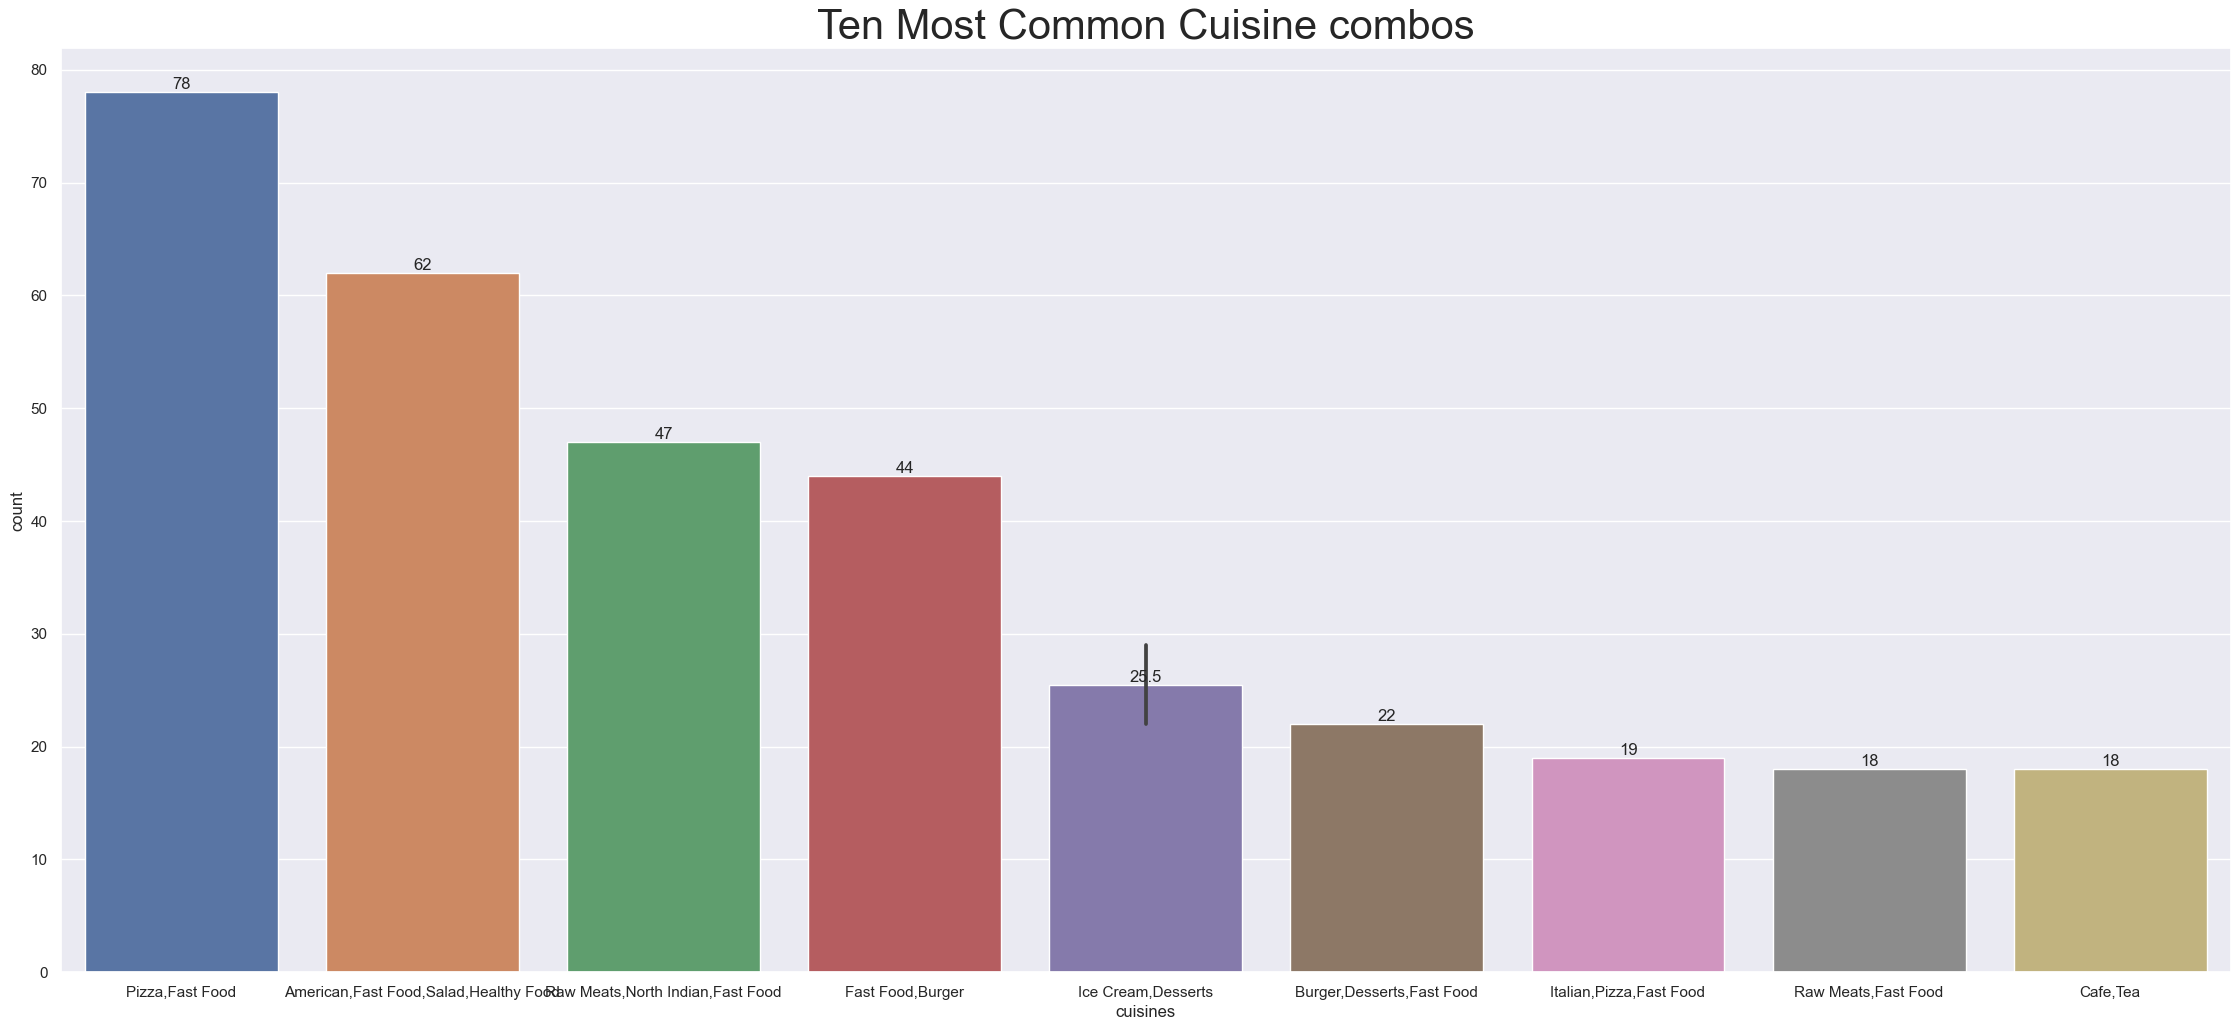

In [16]:
sns.set(rc={'figure.figsize':(28,12)})
x = sns.barplot(x='cuisines',y='count',data=top_10_common_cuisines)
for bars in x.containers:
    x.bar_label(bars)
plt.title("Ten Most Common Cuisine combos",fontsize=30)
plt.show()

## Task3: Geographic Analysis
1. Plot the locations of restaurants on a map using longitude and latitude coordinates.
2. Identify any patterns or clusters of restaurants in specific area

In [17]:
df.columns

Index(['restaurant id', 'restaurant name', 'country code', 'city', 'address',
       'locality', 'locality verbose', 'longitude', 'latitude', 'cuisines',
       'average cost for two', 'currency', 'has table booking',
       'has online delivery', 'is delivering now', 'switch to order menu',
       'price range', 'aggregate rating', 'rating color', 'rating text',
       'votes'],
      dtype='object')

In [18]:
df2 = df[['country code','city','longitude','latitude']]
df2.head()

,country code,city,longitude,latitude
0,162,Makati City,121.027535,14.565443
1,162,Makati City,121.014101,14.553708
2,162,Mandaluyong City,121.056831,14.581404
3,162,Mandaluyong City,121.056475,14.585318
4,162,Mandaluyong City,121.057508,14.584450


In [19]:
df2.shape

(9551, 4)

In [20]:
# for geographical visualization importing geopandas library
import geopandas as gpd 
from shapely.geometry import Point


In [21]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)
# here we converted the long and lat to geometrical points using two 
# co-ordinates system points_xy in geopandas

In [22]:
# to get the world map 
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 

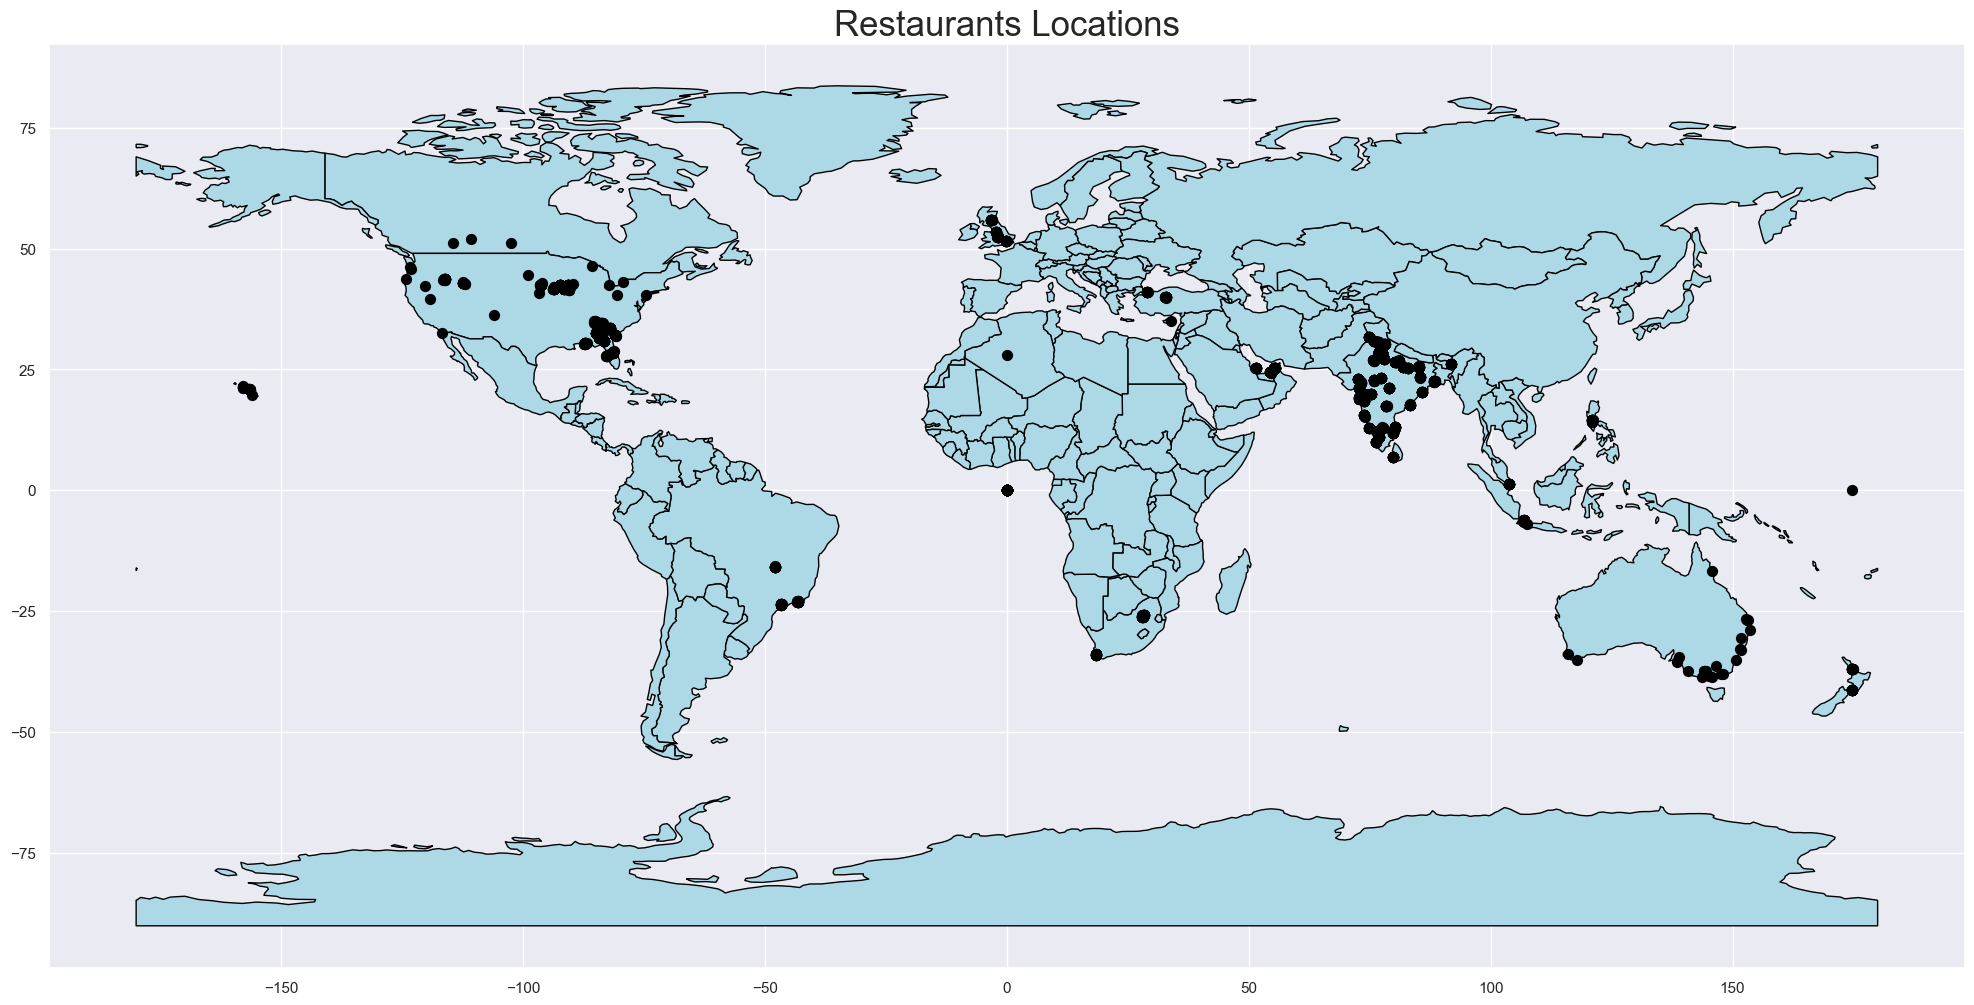

In [23]:
# to plot restaurants on world map
axis = world_data.plot(color='lightblue',edgecolor='black')

geo_df.plot(ax=axis, color='black', markersize=50, label='Cities')
plt.title("Restaurants Locations",fontsize=25)
plt.show()

### By this visualization we can conclude that most of the restaurants are located in India and North America with a few in Australia.

In [24]:
#  To find patterns in restaurants of diffrent countries we are taking country code, aggregate rating, votes and 
#  avg cost for 2 from the main dataset and drawing patterns with these fields for different countries.
df3 = df[['country code','aggregate rating','votes']]

In [25]:
agg_rating_country = df3.groupby('country code',as_index=False).agg({'aggregate rating':'mean'})
agg_rating_country['aggregate rating'] = agg_rating_country['aggregate rating'].round(2)

In [26]:
vote_country = df3.groupby('country code',as_index=False).agg({'votes':'mean'})
vote_country['votes'] = vote_country['votes'].round(2)

In [27]:
df_country = agg_rating_country.merge(vote_country)
df_country

,country code,aggregate rating,votes
0,1,2.52,137.21
1,14,3.66,111.42
2,30,3.76,19.62
3,37,3.58,103.00
4,94,4.30,772.10
5,148,4.26,243.02
6,162,4.47,407.41
7,166,4.06,163.80
8,184,3.58,31.90
9,189,4.21,315.17


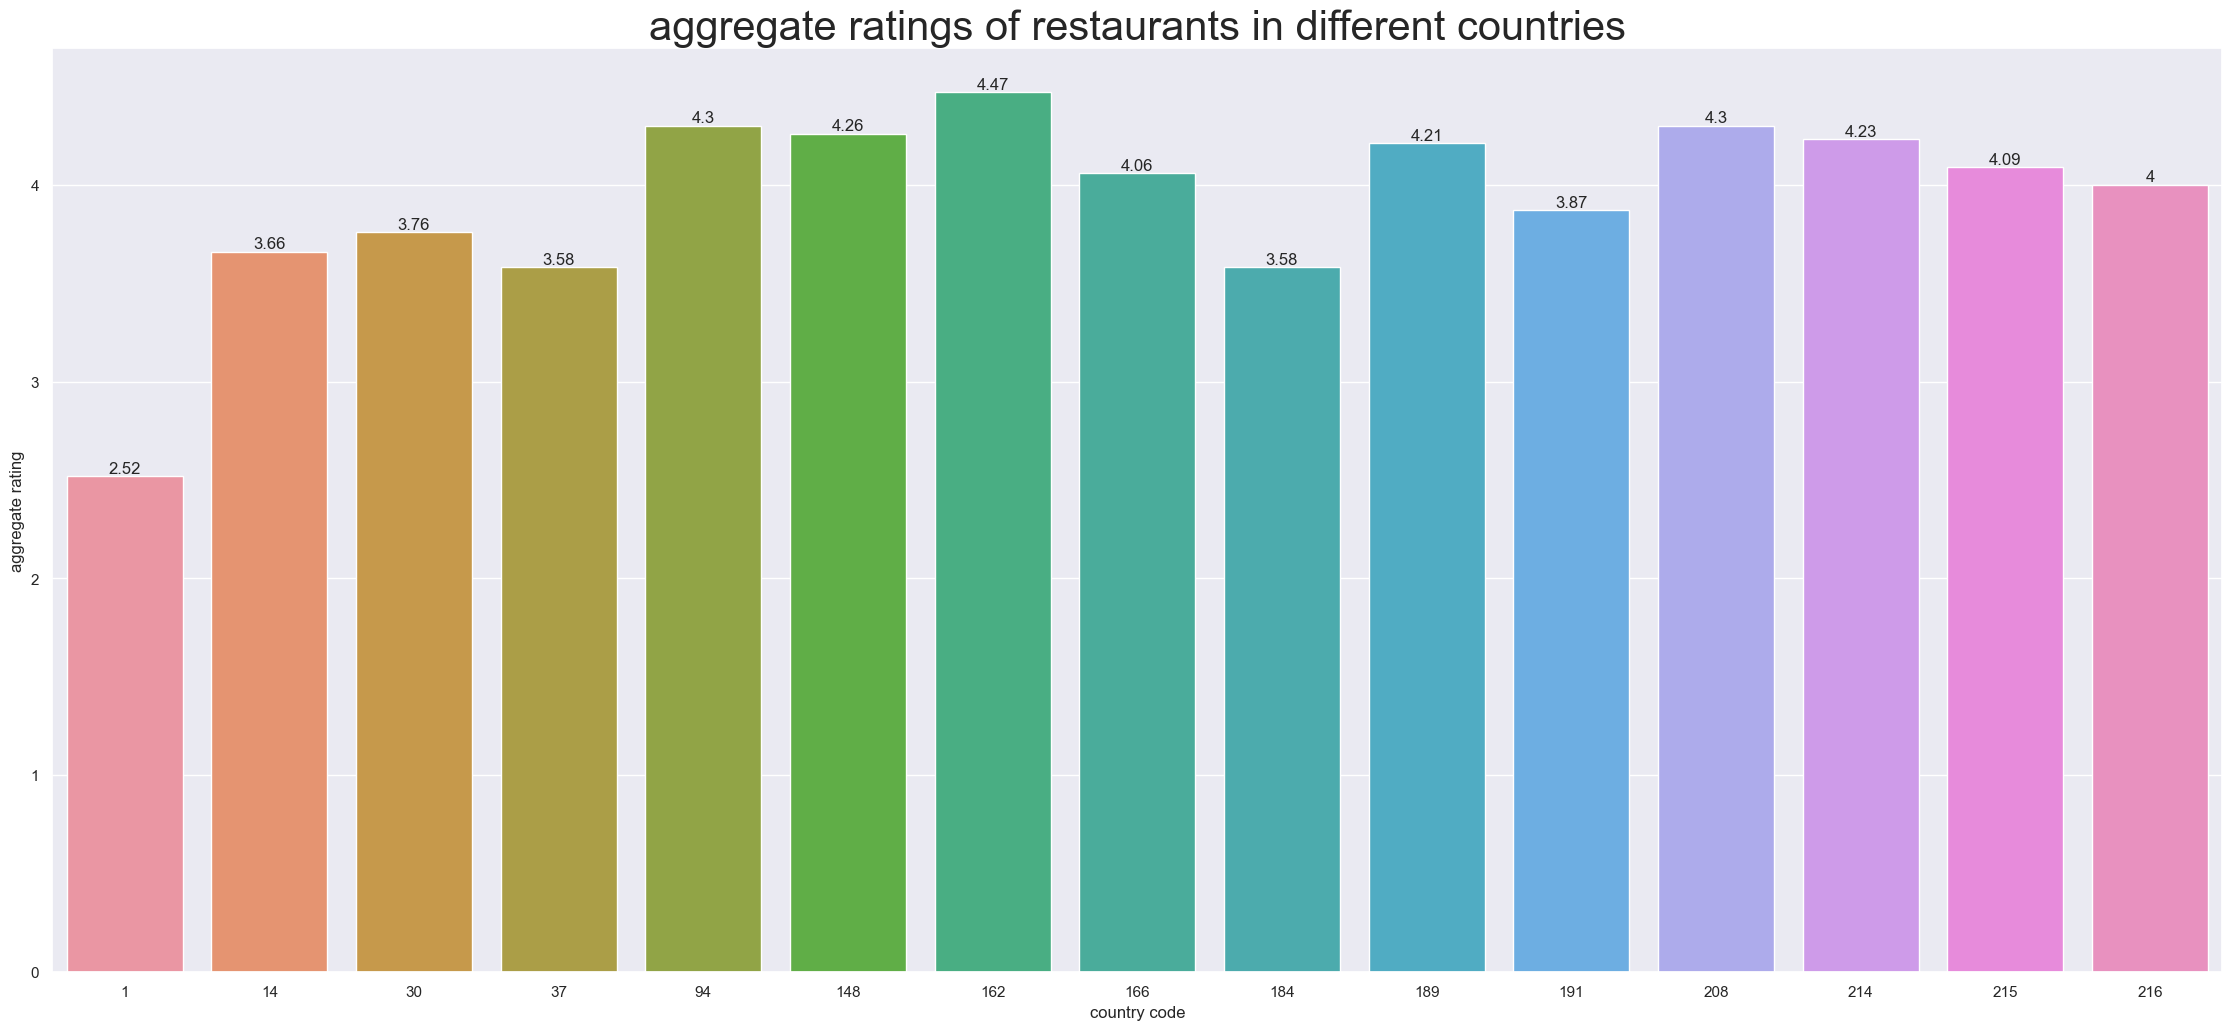

In [28]:
# plotting the trends
x= sns.barplot(x='country code',y='aggregate rating',data=df_country)
for bars in x.containers:
    x.bar_label(bars)
plt.title("aggregate ratings of restaurants in different countries",fontsize=30)
plt.show()

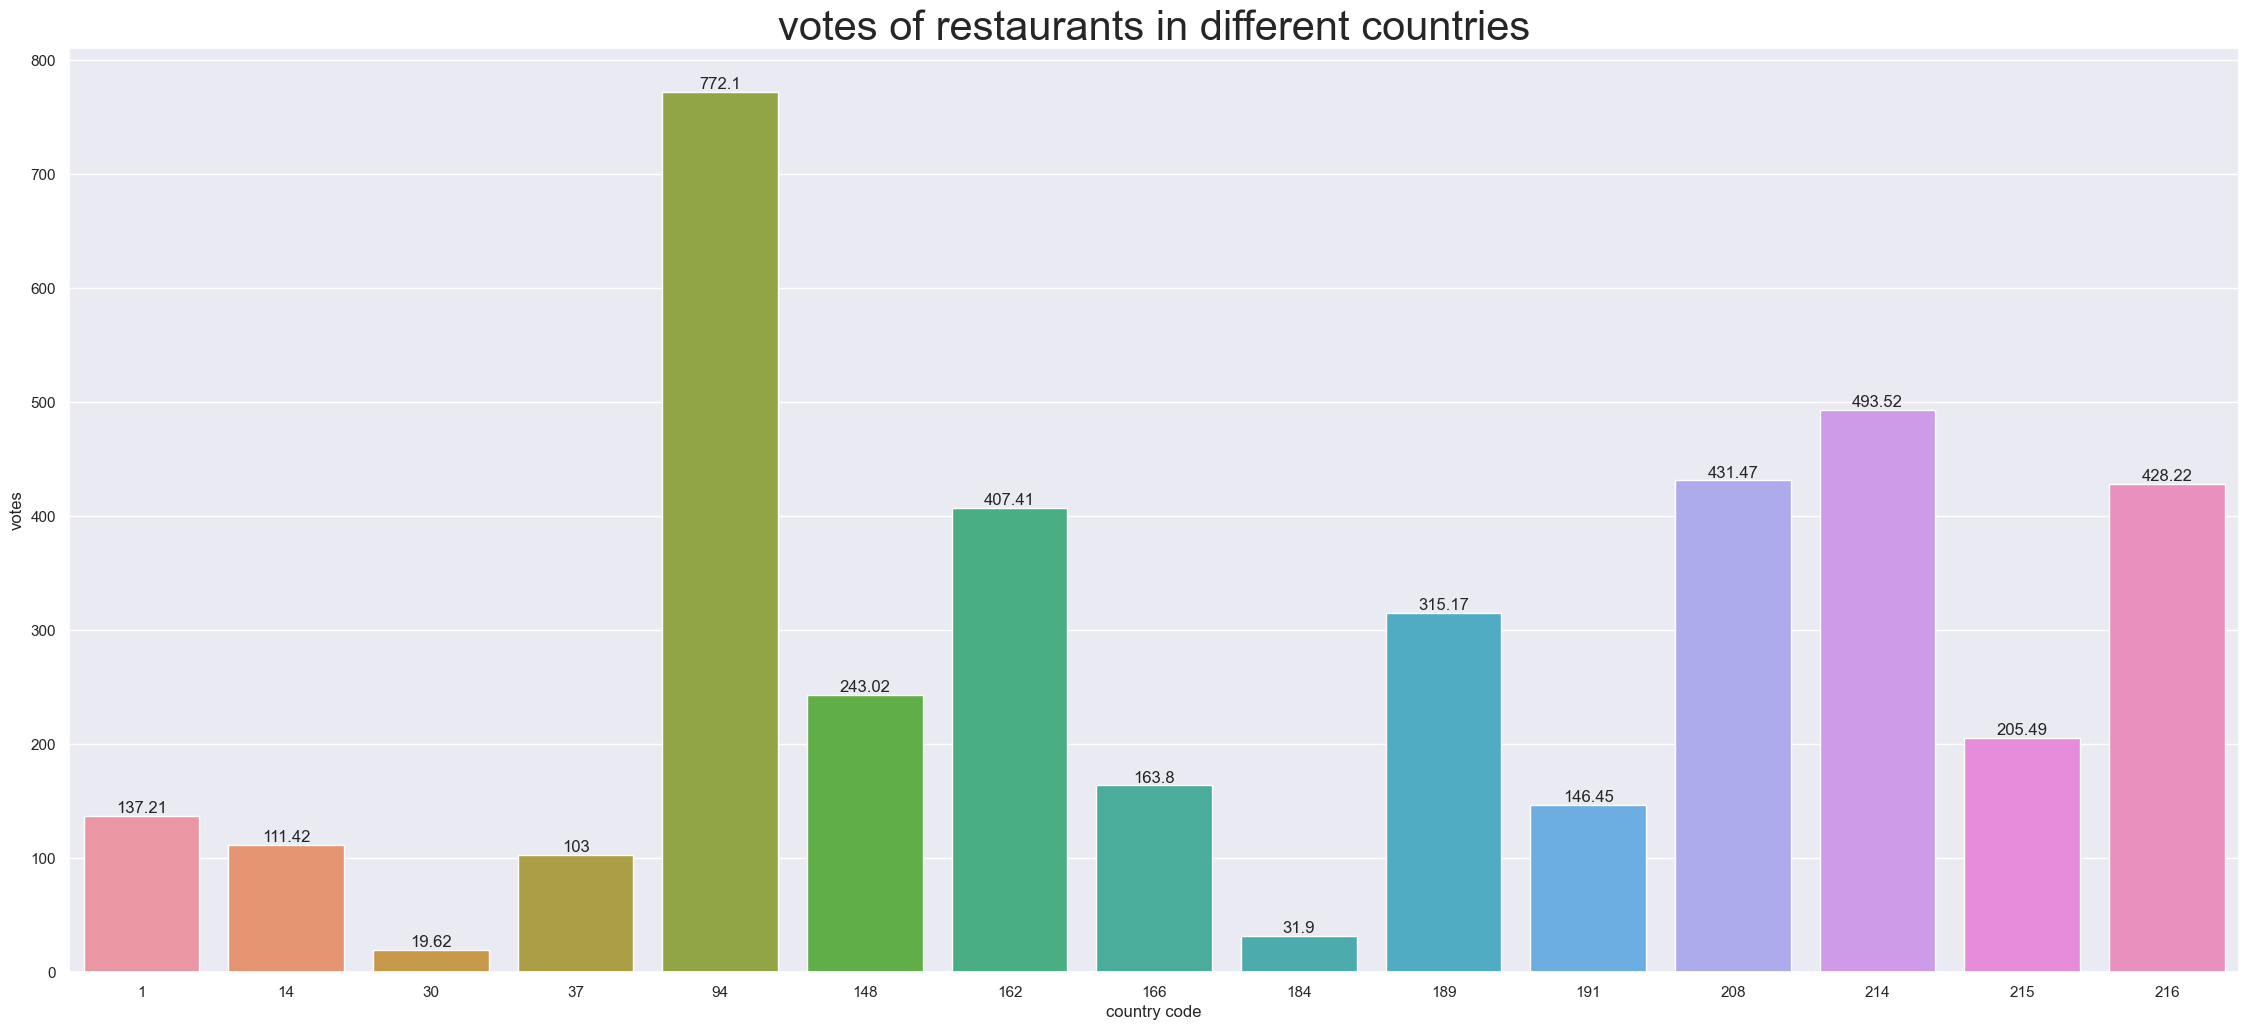

In [29]:
x= sns.barplot(x='country code',y='votes',data=df_country)
for bars in x.containers:
    x.bar_label(bars)
plt.title("votes of restaurants in different countries",fontsize=30)
plt.show()

### So by these visualization we can get paterns of customer reviews of restaurents of particular countries and rank them accordingly

## Task4: Restaurant Chains
1. Identify if there are any restaurant chains present in the dataset.
2. Analyze the ratings and popularity of different restaurant chains.


In [30]:
df.columns

Index(['restaurant id', 'restaurant name', 'country code', 'city', 'address',
       'locality', 'locality verbose', 'longitude', 'latitude', 'cuisines',
       'average cost for two', 'currency', 'has table booking',
       'has online delivery', 'is delivering now', 'switch to order menu',
       'price range', 'aggregate rating', 'rating color', 'rating text',
       'votes'],
      dtype='object')

In [31]:
len(df['restaurant id'].unique())


9551

In [32]:
len(df['restaurant name'].unique())

7446

In [33]:
# There is  difference in total restaurent ids and names means some restaurents have same name but diffrent id due to differnt 
#  outlet. so there are chains of some restaurents.
9551-7446

2105

In [34]:
df4 = df.groupby(['restaurant name','city','address','aggregate rating','votes']).size().reset_index().rename(columns={0:'count'}).sort_values('count',ascending=False)
df4

,restaurant name,city,address,aggregate rating,votes,count
0,#45,Mangalore,"Ground Floor, Trinity Commercial Complex, Near...",3.6,209,1
6362,Pho King Awesome,New Delhi,"41 - Zamrudpur, Near Gurudwara, Greater Kailas...",4.1,253,1
6364,Piali - The Curry Bistro,New Delhi,"K 41, Level 1, Opposite PVR Plaza, Connaught P...",4.1,400,1
6365,Picasso Roof Top,New Delhi,"A-14, Naraina Vihar, New Delhi, Naraina, New D...",3.1,15,1
6366,PiccoLicko,Gurgaon,"Plot 74, Sector 18, Near IFFCO Chowk, Udyog Vi...",3.3,12,1
...,...,...,...,...,...,...
3183,Flying Tuk Tuk,Gurgaon,"Unit 31 - 32, Ground Floor, Vipul Trade Centre...",3.9,28,1
3184,Foji Bhai Hotel,New Delhi,"Main Road, Sadh Nagar, Near Sabji Mandi, Palam...",0.0,0,1
3185,Fomads,Gurgaon,"U-25/27, Ground Floor, DLF Phase 3, Gurgaon",3.6,26,1
3186,Fong's Pizza,Des Moines,"223 4th Street, Des Moines, IA 50309",4.6,728,1


In [35]:
df5 = df4.groupby(['restaurant name']).size().reset_index().rename(columns={0:'count'}).sort_values('count',ascending=False)
df5

,restaurant name,count
1098,Cafe Coffee Day,83
2098,Domino's Pizza,79
6106,Subway,63
2716,Green Chick Chop,51
4077,McDonald's,48
...,...,...
2618,Gian Ji Punjabi Dhaba,1
2617,Ghungroo Club & Bar - By Gautam Gambhir,1
2616,Ghar Ki Handi,1
2615,Ghar Ka Swad,1


In [36]:
restaurant_chains = df5[df5['count']>1]
restaurant_chains

,restaurant name,count
1098,Cafe Coffee Day,83
2098,Domino's Pizza,79
6106,Subway,63
2716,Green Chick Chop,51
4077,McDonald's,48
...,...,...
4121,Metro Fast Food,2
4147,Midnight Hunger,2
3918,Made In Punjab,2
603,Bakingo,2


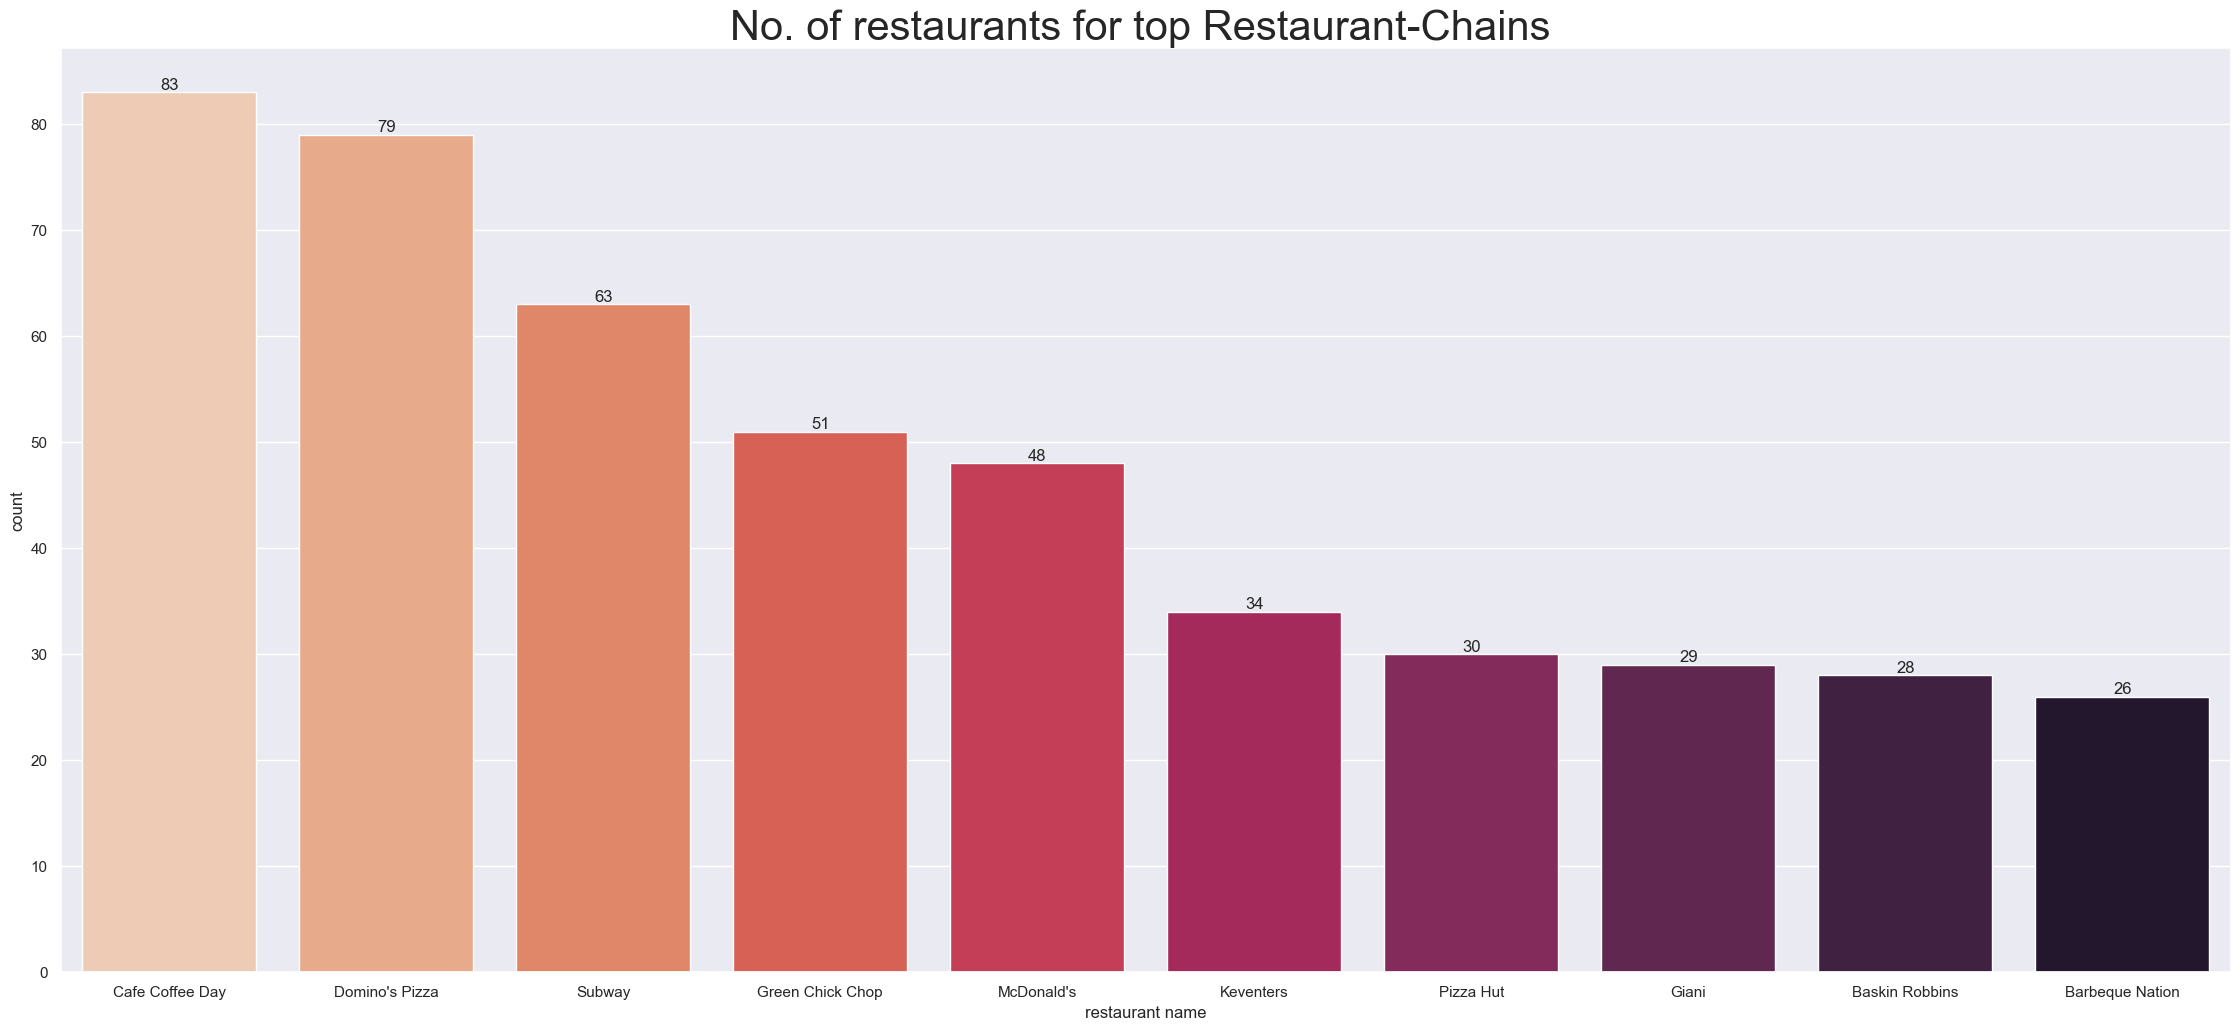

In [37]:
x=sns.barplot(x='restaurant name',y='count',data=restaurant_chains.head(10),palette = "rocket_r")
for bars in x.containers:
    x.bar_label(bars)
plt.title("No. of restaurants for top Restaurant-Chains ",fontsize=30)
plt.show()

### From this Visualization we can conclude that the top Restaurant Chains are
1. Cafe Coffee Day
2. Domino's Pizza
3. Subway
4. Green Chok Chop
5. McDonalds